In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

# Handle dataset

In [12]:
# Import train and test dataset
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

train_shape = train.shape
test_shape = test.shape

print(train_shape)
print(test_shape)

(891, 12)
(418, 11)


In [13]:
# Visualize 10 first rows
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
import matplotlib.pyplot as plt

# Let's see if gender affect survival
# Use pivot_table() to segment our data by sex and calculate the mean of the column Survived
sex_pivot = train.pivot_table(index="Sex",values="Survived")

print(sex_pivot)

# sex_pivot.plot.bar()
# plt.show()

        Survived
Sex             
female  0.742038
male    0.188908


In [15]:
# Let's see if Pclass (ticket class) affect survival
# Use pivot_table() as before

pclass_pivot = train.pivot_table(index="Pclass", values="Survived")
print(pclass_pivot)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [16]:
# Take a look to the "age" column
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Missing values!! **--> We need to handle this!

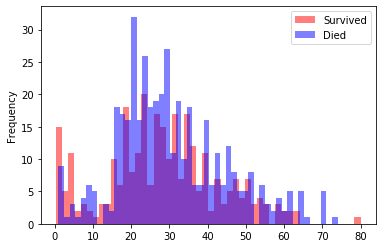

In [17]:
# Age is a continuous numerical column
# Let's use histograms to visualize how age affect survival --> we'll se it's not so good

# Survived histogram
# Get rows for which people survived
survived = train[train["Survived"] == 1]
# Histogram
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)

# Died histogram
# Get rows for which people died
died = train[train["Survived"] == 0]
# Histogram
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)

# Plot
plt.legend(['Survived','Died'])
plt.show()

[]

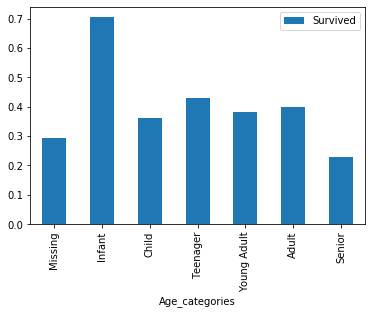

In [18]:
# Let's use categorical features!
# Separate this continuous feature into a categorical feature by dividing it into ranges.
# Use pandas.cut()
# Takes 2 required arguments (dataframe, where_to_cut)
# We use one more argument label_names, this allows to have more readable features

# !!!! IMPORTANT !!!!!!
# Any change we make to the train data, we also need to make to the test data, so let's define a function

def process_age(df, where_to_cut, label_names):
    # Handle missing values
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"], where_to_cut, labels=label_names)
    return df
    
# from -1 to 0 --> Missing
# from 0 to 5 --> Infant
# ......
# from 60 to 100 --> Senior
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
# Define label names
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

# Visualize data using pivot
age_categories_pivot = train.pivot_table(index="Age_categories", values="Survived")
age_categories_pivot.plot.bar()
plt.plot()

# Preparing Data for ML model

In [19]:
# Create dummies Columns
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")

train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")

train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


# Create a Machine Learning model

In [20]:
from sklearn.linear_model import LogisticRegression

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

# Create the LogisitcRegression model
lr = LogisticRegression()

# Split train set in X and y
# X = features (age, sex, ...) 
# y = target (survived)

train_X = train[columns]
train_y = train["Survived"]

# Train the model
lr.fit(train_X, train_y)

# Predict on test set
test_pred = lr.predict(test[columns])
print(test_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [23]:
# Preparing data for submission
test_ids = test["PassengerId"]
submission_df = {"PassengerId": test_ids,
                 "Survived": test_pred}

submission = pd.DataFrame(submission_df)

print(submission)

submission.to_csv('titanic_submission.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
